In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
from sklearn import metrics
import seaborn as sns
import seaborn as sn 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [3]:
# Load the dataset
data = pd.read_csv('amazon_baby.csv')

# Display basic information about the dataset
print("Dataset columns:", data.columns)
data.info()
print(data.head())

Dataset columns: Index(['name', 'review', 'rating'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183531 entries, 0 to 183530
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    183213 non-null  object
 1   review  182702 non-null  object
 2   rating  183531 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB
                                                name  \
0                           Planetwise Flannel Wipes   
1                              Planetwise Wipe Pouch   
2                Annas Dream Full Quilt with 2 Shams   
3  Stop Pacifier Sucking without tears with Thumb...   
4  Stop Pacifier Sucking without tears with Thumb...   

                                              review  rating  
0  These flannel wipes are OK, but in my opinion ...       3  
1  it came early and was not disappointed. i love...       5  
2  Very soft and comfortable and warmer than it l...       5

In [4]:
data['name'].value_counts().idxmax()

'Vulli Sophie the Giraffe Teether'

In [5]:
n = 10
data['name'].value_counts()[:n].index.tolist()

['Vulli Sophie the Giraffe Teether',
 'Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L',
 'Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision',
 'Baby Einstein Take Along Tunes',
 'Cloud b Twilight Constellation Night Light, Turtle',
 'Fisher-Price Booster Seat, Blue/Green/Gray',
 'Fisher-Price Rainforest Jumperoo',
 'Graco Nautilus 3-in-1 Car Seat, Matrix',
 'Leachco Snoogle Total Body Pillow',
 'Regalo Easy Step Walk Thru Gate, White']

In [6]:
# Filter data for a specific product (example: 'Vulli Sophie the Giraffe Teether')
product_reviews = data[data['name'] == 'Vulli Sophie the Giraffe Teether']
print(f"Number of reviews for the product: {len(product_reviews)}")

Number of reviews for the product: 785


In [7]:
print(product_reviews['rating'])

34313     5
34314     5
34315     1
34316     5
34317     5
         ..
159649    5
159650    5
159651    5
159652    5
159653    5
Name: rating, Length: 785, dtype: int64


In [8]:
# Step 1: Ensure data is clean
# Drop rows with missing values in 'product' or 'rating'
data = data.dropna(subset=['name', 'rating'])

# Step 2: Remove neutral ratings (3) and create binary labels
data = data[data['rating'] != 3]  # Remove neutral ratings
data['is_negative'] = data['rating'] <= 2  # Negative reviews: True if 1 or 2, otherwise False

# Step 3: Group by product and count negative reviews
negative_review_counts = (
    data[data['is_negative']]  # Filter for negative reviews
    .groupby('name')        # Group by product
    .size()                    # Count the number of negative reviews per product
    .to_dict()                 # Convert to dictionary for easy lookup
)

# Step 4: Find the product with the most negative reviews
if negative_review_counts:  # Check if there are any negative reviews
    name_with_most_negatives = max(negative_review_counts, key=negative_review_counts.get)
    print(f"Product with the most negative reviews: {name_with_most_negatives}")
    print(f"Negative review count: {negative_review_counts[name_with_most_negatives]}")
else:
    print("No products with negative reviews found.")

Product with the most negative reviews: Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision
Negative review count: 133


In [9]:
# Filter data for a specific product (example: 'Infant Monitor ')
product_bad_reviews = data[data['name'] == 'Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision']

In [10]:
print(product_bad_reviews['rating'])

134502    1
134503    5
134504    5
134505    5
134506    4
         ..
135058    4
135059    1
135060    5
135061    5
135062    5
Name: rating, Length: 519, dtype: int64


In [11]:
# Preprocess the data
# Remove rows with missing values in the 'review' column
product_reviews = product_reviews.dropna(subset=['review'])

# Ensure all reviews are of string type
product_reviews['review'] = product_reviews['review'].astype(str)

# Remove rows with neutral ratings (3) and create binary labels for positive (4, 5) and negative (1, 2) ratings
product_reviews = product_reviews[product_reviews['rating'] != 3]
product_reviews['rating'] = product_reviews['rating'] >= 4  # Positive: True (>=4), Negative: False (1, 2)
print(product_reviews['rating'])



34313      True
34314      True
34315     False
34316      True
34317      True
          ...  
159649     True
159650     True
159651     True
159652     True
159653     True
Name: rating, Length: 717, dtype: bool


In [12]:
# Preprocess the data
# Remove rows with missing values in the 'review' column
product_bad_reviews = product_bad_reviews.dropna(subset=['review'])

# Ensure all reviews are of string type
product_bad_reviews['review'] = product_bad_reviews['review'].astype(str)

# Remove rows with neutral ratings (3) and create binary labels for positive (4, 5) and negative (1, 2) ratings
product_bad_reviews = product_bad_reviews[product_bad_reviews['rating'] != 3]
product_bad_reviews['rating'] = product_bad_reviews['rating'] >= 4  # Positive: True (>=4), Negative: False (1, 2)
print(product_bad_reviews['rating'])

134502    False
134503     True
134504     True
134505     True
134506     True
          ...  
135058     True
135059    False
135060     True
135061     True
135062     True
Name: rating, Length: 517, dtype: bool


In [13]:
print("The shape of our data:",product_reviews.shape,"\n")

# print columns names
print("Our column names are:",product_reviews.columns.values)

The shape of our data: (717, 3) 

Our column names are: ['name' 'review' 'rating']


In [14]:
print("The shape of our bad reviews data:",product_bad_reviews.shape,"\n")

# print columns names
print("Our column names are:",product_bad_reviews.columns.values)

The shape of our bad reviews data: (517, 4) 

Our column names are: ['name' 'review' 'rating' 'is_negative']


In [15]:
vectorizer = TfidfVectorizer()
# tokenize and build vocab
review_new =product_reviews['review']
vectorizer.fit(review_new)
# summarize
print(sorted(vectorizer.vocabulary_))
# encode document
vector = vectorizer.transform(review_new)
review_new_vector = vectorizer.fit_transform(review_new)
print(review_new_vector)
words = vectorizer.get_feature_names_out()
print(words[:200])

['00', '09', '10', '100', '11', '12', '128522', '1360729347', '14', '15', '15months', '16', '16month', '17', '18', '19', '1956', '1961', '1st', '20', '2011', '2013', '2013well', '21', '21m', '22', '23', '25', '29', '2nd', '2yrs', '30', '34', '376', '3777th', '3mo', '3x', '40', '48', '4th', '50', '5mo', '5month', '5th', '5x', '65', '6m', '6mo', '6months', '6mos', '6th', '70', '7mo', '80', '8230', '99', 'ability', 'abit', 'able', 'about', 'absolute', 'absolutely', 'absorbing', 'abuse', 'abuses', 'acceptable', 'accessory', 'accident', 'accidently', 'accompanied', 'accompanying', 'account', 'accumulates', 'accurate', 'across', 'active', 'actively', 'actual', 'actually', 'add', 'added', 'addictive', 'adding', 'addition', 'additionally', 'addressing', 'adds', 'admit', 'admits', 'adopted', 'adorable', 'adore', 'adored', 'adores', 'adoring', 'adrienne', 'adroable', 'adult', 'advance', 'adventures', 'advertising', 'advice', 'advised', 'afraid', 'after', 'again', 'against', 'age', 'aggressive', 

In [16]:

# tokenize and build vocab
review_bad_new =product_bad_reviews['review']
vectorizer1 = HashingVectorizer(n_features=3617)
vectorizer1.fit(review_bad_new)
# summarize
#print(sorted(vectorizer1.vocabulary_))
# encode document
vector1 = vectorizer1.transform(review_bad_new)
review_bad_new_vector = vectorizer.fit_transform(review_bad_new)
print(review_bad_new_vector)
words_bad = vectorizer1.get_feature_names_out()
print(words_bad[:200])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 36207 stored elements and shape (517, 3617)>
  Coords	Values
  (0, 1722)	0.19160515276638848
  (0, 1762)	0.5410841504103927
  (0, 2260)	0.1735014259975402
  (0, 3538)	0.28414988737632785
  (0, 2879)	0.27064682050985134
  (0, 3203)	0.27064682050985134
  (0, 1898)	0.39322414233573466
  (0, 2294)	0.45042420153713814
  (0, 3553)	0.13417767736885905
  (0, 3198)	0.08693974931735989
  (0, 530)	0.1735014259975402
  (1, 1722)	0.20919408820933724
  (1, 3553)	0.09766326381785076
  (1, 3198)	0.221481467269265
  (1, 3217)	0.03618830101849707
  (1, 1428)	0.11633217968190873
  (1, 1865)	0.1777635211818235
  (1, 2056)	0.11872432025322971
  (1, 1100)	0.1263004067114023
  (1, 1279)	0.04303254007772529
  (1, 2449)	0.06626829290747732
  (1, 3495)	0.05264123732185446
  (1, 459)	0.08034496647029925
  (1, 3259)	0.11271558722388306
  (1, 2637)	0.1277656990032261
  :	:
  (516, 1722)	0.06464223427285348
  (516, 2260)	0.23413816724817396
  (516, 3198)

AttributeError: 'HashingVectorizer' object has no attribute 'get_feature_names_out'

In [17]:
print (review_new)
print (review_new_vector)

34313     He likes chewing on all the parts especially t...
34314     My son loves this toy and fits great in the di...
34315     There really should be a large warning on the ...
34316     All the moms in my moms\' group got Sophie for...
34317     I was a little skeptical on whether Sophie was...
                                ...                        
159649    My baby loves her Sophie Chew Toy. She can che...
159650    Sophie the Giraffe was a big hit at the baby s...
159651    quick shipping and perfect product. I would pu...
159652    My baby who is currently teething love his Sop...
159653    I know several baits that are enjoying the sof...
Name: review, Length: 717, dtype: object
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 33027 stored elements and shape (717, 3242)>
  Coords	Values
  (0, 1310)	0.26076554430157395
  (0, 1622)	0.21156188865049852
  (0, 490)	0.18663351217696628
  (0, 1935)	0.09921738610940559
  (0, 125)	0.142283537504446
  (0, 2863)	0.220632

In [18]:
vocab_size = len(words)
print(f'Number of words: {vocab_size}')

Number of words: 3242


In [117]:
vocab_bad_size = len(words_bad)
print(f'Number of words: {vocab_bad_size}')

Number of words: 3617


In [118]:
print(vector.shape)
print(vector.toarray())


(717, 3242)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
print(vector1.shape)
print(vector1.toarray())

(517, 3617)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
print(vectorizer.idf_)
print(vectorizer1.idf_)

[5.86368088 6.55682806 4.25424297 ... 5.1705337  5.30406509 6.55682806]


AttributeError: 'HashingVectorizer' object has no attribute 'idf_'

In [21]:
# Define features (X) and target (y)
X = product_reviews['review'] # Text reviews
y = product_reviews['rating']  # Binary target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [22]:
# Define features (X) and target (y)
X1 = product_bad_reviews['review'] # Text reviews
y1 = product_bad_reviews['rating']  # Binary target

# Split the dataset into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=22)

In [23]:
print(product_reviews['rating'][:200])
count_true = (product_reviews['rating'] == True).sum()
print("Count of True:", count_true)
count_true = (product_reviews['rating'] == False).sum()
print("Count of False:", count_true)


34313     True
34314     True
34315    False
34316     True
34317     True
         ...  
34525    False
34526     True
34527     True
34528     True
34529     True
Name: rating, Length: 200, dtype: bool
Count of True: 624
Count of False: 93


In [24]:
print(product_bad_reviews['rating'][:200])
count1_true = (product_bad_reviews['rating'] == True).sum()
print("Count of True:", count1_true)
count1_true = (product_bad_reviews['rating'] == False).sum()
print("Count of False:", count1_true)

134502    False
134503     True
134504     True
134505     True
134506     True
          ...  
134707    False
134708     True
134709     True
134710     True
134711     True
Name: rating, Length: 200, dtype: bool
Count of True: 384
Count of False: 133


In [25]:
print(X)
print(y)
print(y[:200])
count_true = (y_test== True).sum()
print("Count of True:", count_true)
count_false = (y_test== False).sum()
print("Count of False:", count_false)

34313     He likes chewing on all the parts especially t...
34314     My son loves this toy and fits great in the di...
34315     There really should be a large warning on the ...
34316     All the moms in my moms\' group got Sophie for...
34317     I was a little skeptical on whether Sophie was...
                                ...                        
159649    My baby loves her Sophie Chew Toy. She can che...
159650    Sophie the Giraffe was a big hit at the baby s...
159651    quick shipping and perfect product. I would pu...
159652    My baby who is currently teething love his Sop...
159653    I know several baits that are enjoying the sof...
Name: review, Length: 717, dtype: object
34313      True
34314      True
34315     False
34316      True
34317      True
          ...  
159649     True
159650     True
159651     True
159652     True
159653     True
Name: rating, Length: 717, dtype: bool
34313     True
34314     True
34315    False
34316     True
34317     True
         

In [26]:
# Convert text data into numerical format using CountVectorizer for model training for SOPHI GIRAFFE
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

print(X_train_vectorized[:100])


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3837 stored elements and shape (100, 3617)>
  Coords	Values
  (0, 85)	0.06920353673988622
  (0, 88)	0.18176510528908357
  (0, 205)	0.12877864858163987
  (0, 208)	0.03156114616240295
  (0, 230)	0.08056338498177681
  (0, 275)	0.06479402490046078
  (0, 293)	0.056717316109482094
  (0, 328)	0.28013964922277074
  (0, 329)	0.05341836641798753
  (0, 368)	0.06116887801296864
  (0, 411)	0.0865698310023242
  (0, 416)	0.12085474544967052
  (0, 459)	0.07416233672775438
  (0, 509)	0.04547721535149041
  (0, 606)	0.1298759423335636
  (0, 747)	0.13714907313801322
  (0, 856)	0.11174812014865763
  (0, 980)	0.08360440345253477
  (0, 986)	0.18176510528908357
  (0, 1040)	0.15636415229972803
  (0, 1045)	0.14703663738843178
  (0, 1178)	0.18176510528908357
  (0, 1279)	0.07944228164373177
  (0, 1479)	0.04747697579649215
  (0, 1483)	0.10088012564097636
  :	:
  (98, 2842)	0.47272074550992693
  (98, 3195)	0.19233727305681544
  (98, 3198)	0.0359244677923

In [128]:
# Convert text data into numerical format using CountVectorizer for model training for MONITOR
X1_train_vectorized = vectorizer1.transform(X1_train)
X1_test_vectorized = vectorizer1.transform(X1_test)

print(X1_train_vectorized[:100])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6781 stored elements and shape (100, 3617)>
  Coords	Values
  (0, 20)	0.07053456158585983
  (0, 64)	0.07053456158585983
  (0, 108)	0.07053456158585983
  (0, 304)	0.07053456158585983
  (0, 312)	0.07053456158585983
  (0, 322)	0.21160368475757949
  (0, 325)	0.14106912317171966
  (0, 346)	0.07053456158585983
  (0, 518)	-0.07053456158585983
  (0, 640)	-0.07053456158585983
  (0, 708)	-0.14106912317171966
  (0, 717)	-0.07053456158585983
  (0, 873)	-0.21160368475757949
  (0, 1063)	0.07053456158585983
  (0, 1074)	-0.07053456158585983
  (0, 1139)	0.07053456158585983
  (0, 1141)	0.07053456158585983
  (0, 1156)	0.07053456158585983
  (0, 1173)	0.07053456158585983
  (0, 1214)	0.21160368475757949
  (0, 1496)	-0.07053456158585983
  (0, 1554)	0.07053456158585983
  (0, 1561)	0.07053456158585983
  (0, 1621)	0.07053456158585983
  (0, 1703)	-0.07053456158585983
  :	:
  (99, 1763)	0.0873704056661038
  (99, 1788)	0.0873704056661038
  (99, 1843)	-0

In [129]:
print("X_train shape:", X_train_vectorized.shape)
print("X_test shape:", X_test_vectorized.shape)
print("y_train shape:", len(y_train))
print("y_test shape:", len(y_test))

X_train shape: (573, 3617)
X_test shape: (144, 3617)
y_train shape: 573
y_test shape: 144


In [130]:
print("X1_train shape:", X1_train_vectorized.shape)
print("X1_test shape:", X1_test_vectorized.shape)
print("y1_train shape:", len(y1_train))
print("y1_test shape:", len(y1_test))

X1_train shape: (413, 3617)
X1_test shape: (104, 3617)
y1_train shape: 413
y1_test shape: 104


In [ ]:
model = LogisticRegression(class_weight='balanced',max_iter=1000, random_state=42) #Sophie GIRR
model.fit(X_train_vectorized, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [132]:
model1 = LogisticRegression(class_weight='balanced',max_iter=1000, random_state=42) #Monitor 
model1.fit(X1_train_vectorized, y1_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [133]:
y_pred = model.predict(X_test_vectorized)
print("Predictions:", y_pred[:10])  # Display first 10 predictions

Predictions: [ True  True  True  True  True  True  True  True  True  True]


In [134]:
y1_pred = model.predict(X1_test_vectorized)
print("Predictions:", y1_pred[:10])  # Display first 10 predictions

Predictions: [False  True  True  True  True  True  True  True  True  True]


In [135]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8888888888888888
Classification Report:
              precision    recall  f1-score   support

       False       0.52      0.65      0.58        17
        True       0.95      0.92      0.94       127

    accuracy                           0.89       144
   macro avg       0.74      0.78      0.76       144
weighted avg       0.90      0.89      0.89       144



In [136]:
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y1_test, y1_pred))

Accuracy: 0.8076923076923077
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        19
        True       0.82      0.99      0.89        85

    accuracy                           0.81       104
   macro avg       0.41      0.49      0.45       104
weighted avg       0.67      0.81      0.73       104



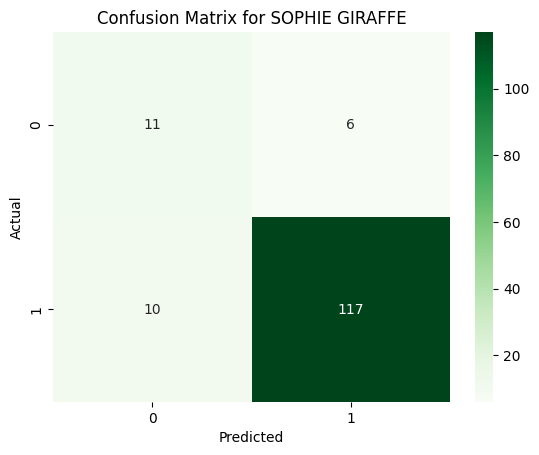

In [137]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for SOPHIE GIRAFFE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

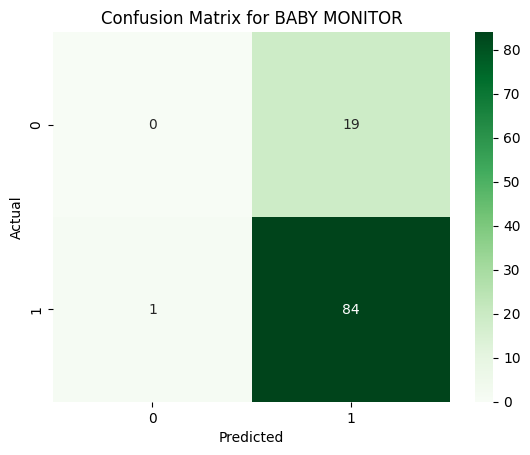

In [138]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y1_test, y1_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for BABY MONITOR')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [139]:
test_data= data[data['name'] == 'Cloud b Twilight Constellation Night Light, Turtle']
test_data_rating=data['rating']

print(f"Number of reviews for the product: {len(test_data['name'])}")
print (test_data)

Number of reviews for the product: 490
                                                    name  \
23339  Cloud b Twilight Constellation Night Light, Tu...   
23340  Cloud b Twilight Constellation Night Light, Tu...   
23342  Cloud b Twilight Constellation Night Light, Tu...   
23343  Cloud b Twilight Constellation Night Light, Tu...   
23344  Cloud b Twilight Constellation Night Light, Tu...   
...                                                  ...   
23853  Cloud b Twilight Constellation Night Light, Tu...   
23854  Cloud b Twilight Constellation Night Light, Tu...   
23855  Cloud b Twilight Constellation Night Light, Tu...   
23857  Cloud b Twilight Constellation Night Light, Tu...   
23858  Cloud b Twilight Constellation Night Light, Tu...   

                                                  review  rating  is_negative  
23339  This ladybug has helped my 2 year old daughter...       5        False  
23340  this thing puts stars everywhere, ceiling and ...       5        False  


In [27]:
#print(test_data['rating'])

In [140]:
test10=test_data['review'].sample(n=10)


print (test10)
#sample_reviews = data.sample(n=10, random_state=42)

23843    We bought this and our kids (who share a room)...
23700    I bought this ladybug for my daughter who is a...
23435    This is absolutely the best night light I\'ve ...
23786    My kids got this when they were infants. It is...
23576    We bought this for my daughter as a birthday g...
23493    I bought the twilight turtle and sea turtle fo...
23741    I originally bought one of these, the turtle, ...
23350    I like the product.  It will be perfect if the...
23450    Bought my son who is now 4 the turtle two year...
23546    I bought the Twilight Turtle for my niece\'s b...
Name: review, dtype: object


In [142]:
test10_vectorized = vectorizer.transform(test10)

# Make predictions
new_predictions = model.predict(test10_vectorized)
new_bad_predictions = model1.predict(test10_vectorized)
# Map predictions to labels
label_map = {0: "Negative", 1: "Positive"}
labeled_predictions = [label_map[pred] for pred in new_predictions]
labeled_predictions1 = [label_map[pred] for pred in new_bad_predictions]
# Display results
for review, prediction in zip(test10, labeled_predictions):
    print(f"Review: {review}\nPrediction: {prediction}\n")
for review, prediction in zip(test10, labeled_predictions1):    
    print(f"Review us Bad: {review}\nPrediction: {prediction}\n")

Review: We bought this and our kids (who share a room) love it. Our 4 year old doesn\'t even fuss about brushing her teeth because if she does, she\'ll get to turn on the turtle and pick the color. Our kids have a large bedroom and it shows the stars very well. Great product, good price.
Prediction: Positive

Review: I bought this ladybug for my daughter who is almost 3 and she loves it.  My 4 month old son has the turtle one which is great too!
Prediction: Positive

Review: This is absolutely the best night light I\'ve bought so far. We only have blinds covering the windows, so there\'s always quite a bit of outdoor light shining in, but this little lady bug really works! It projects perfectly shaped stars onto the walls and every night my little one positions it so that the moon is right above her head. It\'s her little nighttime routine to &#34;find the moon&#34;. Ladybug is right next to her pillow and even though the light shining through the little holes is quite strong, it\'s no

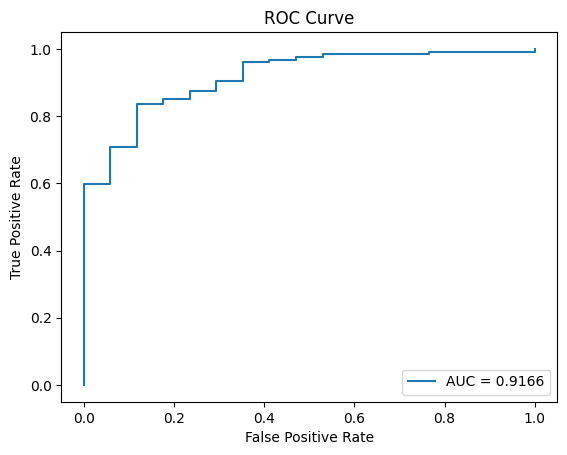

In [143]:
# Use predict_proba to get probabilities for the positive class USING MODEL WHIH GIRAFE
y_prob = model.predict_proba(X_test_vectorized)[:, 1]

# Compute ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)

# Compute AUC
auc = metrics.roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label="AUC = " + str(round(auc, 4)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc=4)
plt.show()

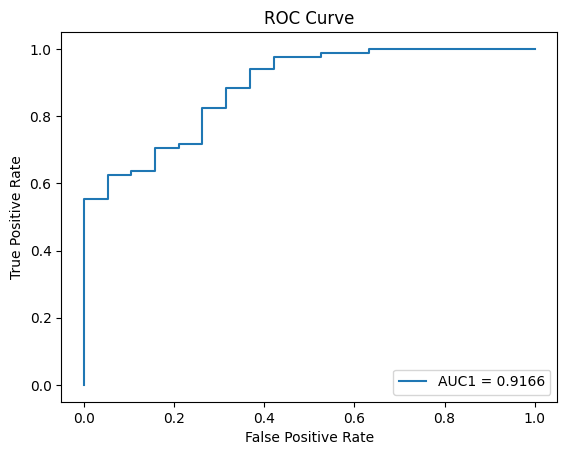

In [146]:
# Use predict_proba to get probabilities for the positive class BABY MONITOR 
y1_prob = model1.predict_proba(X1_test_vectorized)[:, 1]

# Compute ROC curve
fpr1, tpr1, _ = metrics.roc_curve(y1_test, y1_prob)

# Compute AUC
auc1 = metrics.roc_auc_score(y1_test, y1_prob)

# Plot ROC curve
plt.plot(fpr1, tpr1, label="AUC1 = " + str(round(auc, 4)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc=4)
plt.show()

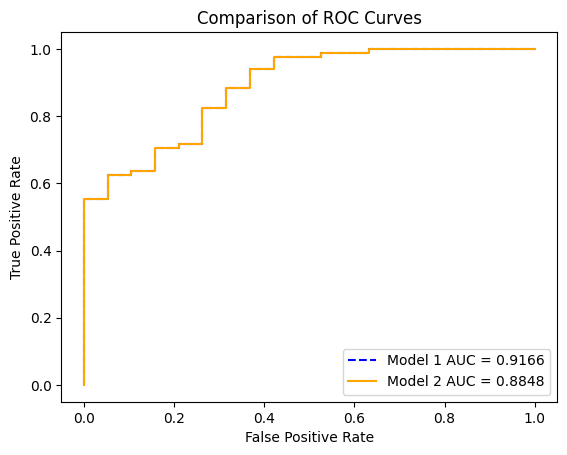

In [158]:
plt.plot(fpr, tpr, label="Model 1 AUC = " + str(round(auc, 4)), linestyle="--", color="blue")
plt.plot(fpr1, tpr1, label="Model 2 AUC = " + str(round(auc1, 4)),linestyle="-", color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparison of ROC Curves")
plt.legend(loc=4)
plt.show()

In [151]:
min_length = min(len(y_prob), len(y1_prob))  # Find the shorter length

y_prob_truncated = y_prob[:min_length]  # Trim longer array
y1_prob_truncated = y1_prob[:min_length]  # Trim longer array

correlation = np.corrcoef(y_prob_truncated, y1_prob_truncated)[0, 1]
print(f"Correlation between y_prob and y1_prob: {correlation:.4f}")

Correlation between y_prob and y1_prob: -0.1640


In [149]:
print("Class distribution in y_test:", np.bincount(y_test))
print("Class distribution in y1_test:", np.bincount(y1_test))

Class distribution in y_test: [ 17 127]
Class distribution in y1_test: [19 85]


In [159]:
print(f"fpr (Model 1): {fpr[:10]}")
print(f"fpr (Model 2): {fpr1[:10]}")

fpr (Model 1): [0.         0.         0.         0.05263158 0.05263158 0.10526316
 0.10526316 0.15789474 0.15789474 0.21052632]
fpr (Model 2): [0.         0.         0.         0.05263158 0.05263158 0.10526316
 0.10526316 0.15789474 0.15789474 0.21052632]


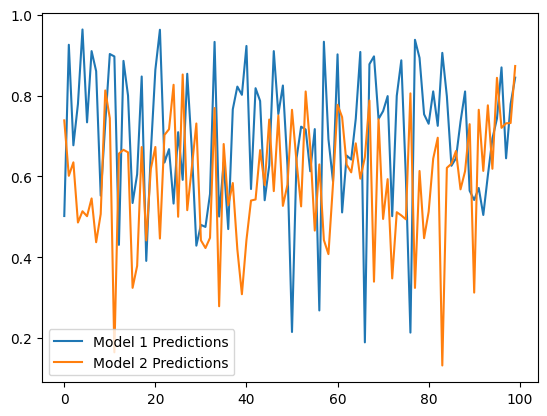

In [160]:
plt.plot(y_prob[:100], label="Model 1 Predictions")
plt.plot(y1_prob[:100], label="Model 2 Predictions")
plt.legend()
plt.show()